In [499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [500]:
data = pd.read_csv("Training_Data_Set.csv")
outdata = pd.read_csv("Test_Data_Set.csv")
print(data.head(5))

      Id   Maker    model   Location  Distance       Owner Type  \
0  25001   skoda  octavia  Ahmedabad        NaN          Second   
1  25002    fiat    panda  Ahmedabad    27750.0           Third   
2  25003     bmw       x1  Hyderabad    46000.0           Third   
3  25004  nissan     juke     Mumbai    43949.0           Third   
4  25005     bmw       x5     Jaipur    59524.0  Fourth & Above   

   manufacture_year  Age of car  engine_displacement  engine_power body_type  \
0              1964          55                 1964         147.0   compact   
1              2012           7                 1242          51.0       NaN   
2              2014           5                 1995         105.0       NaN   
3              2011           8                 1618         140.0       NaN   
4              2012           7                 2993         180.0       NaN   

   Vroom Audit Rating transmission door_count seat_count fuel_type       Price  
0                   8          man 

In [501]:
data.shape

(53515, 17)

In [502]:
data.dtypes

Id                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
body_type               object
Vroom Audit Rating       int64
transmission            object
door_count              object
seat_count              object
fuel_type               object
Price                  float64
dtype: object

In [503]:
len(data[data.duplicated()])

0

In [504]:
df=data.copy()
df_pred= outdata.copy()

In [505]:
df.drop(['Id', 'body_type', 'manufacture_year'], axis=1, inplace=True) 
df_out= df_pred.drop(['Id','body_type', 'manufacture_year'], axis=1) 

In [506]:
df.isnull().sum()

Maker                     0
model                     0
Location                  0
Distance               1211
Owner Type                0
Age of car                0
engine_displacement       0
engine_power           1439
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
Price                     0
dtype: int64

In [507]:
from sklearn.preprocessing import LabelEncoder
features=['Maker', 'model', 'Location', 'Owner Type']
for col in features:
    le=LabelEncoder()
    df[col] = le.fit_transform(df[col])
    df_out[col] = le.fit_transform(df_out[col])

In [508]:
df.dtypes

Maker                    int32
model                    int32
Location                 int32
Distance               float64
Owner Type               int32
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
transmission            object
door_count              object
seat_count              object
fuel_type               object
Price                  float64
dtype: object

In [509]:
df= df.replace("None", np.NaN)
df_out = df_out.replace("None", np.NaN)
df.isnull().sum()

Maker                     0
model                     0
Location                  0
Distance               1211
Owner Type                0
Age of car                0
engine_displacement       0
engine_power           1439
Vroom Audit Rating        0
transmission              0
door_count             7534
seat_count             8511
fuel_type                 0
Price                     0
dtype: int64

In [510]:
df['transmission'].value_counts()

man     36734
auto    16781
Name: transmission, dtype: int64

In [511]:
trans_type = {'man':0, 'auto':1}
df['transmission'] = df['transmission'].map(trans_type)
df_out['transmission'] = df_out['transmission'].map(trans_type)
df['transmission'].unique()

array([0, 1], dtype=int64)

In [512]:
df['fuel_type'].value_counts()

diesel    27559
petrol    25956
Name: fuel_type, dtype: int64

In [513]:
fuel_type = {'diesel':0, 'petrol':1}
df['fuel_type'] = df['fuel_type'].map(fuel_type)
df_out['fuel_type'] = df_out['fuel_type'].map(fuel_type)
df['fuel_type'].unique()

array([1, 0], dtype=int64)

In [514]:
df['door_count'] = df['door_count'].astype('float')
df['seat_count'] = df['seat_count'].astype('float')

df_out['door_count'] = df_out['door_count'].astype('float')
df_out['seat_count'] = df_out['seat_count'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                53515 non-null  int32  
 1   model                53515 non-null  int32  
 2   Location             53515 non-null  int32  
 3   Distance             52304 non-null  float64
 4   Owner Type           53515 non-null  int32  
 5   Age of car           53515 non-null  int64  
 6   engine_displacement  53515 non-null  int64  
 7   engine_power         52076 non-null  float64
 8   Vroom Audit Rating   53515 non-null  int64  
 9   transmission         53515 non-null  int64  
 10  door_count           45981 non-null  float64
 11  seat_count           45004 non-null  float64
 12  fuel_type            53515 non-null  int64  
 13  Price                53515 non-null  float64
dtypes: float64(5), int32(4), int64(5)
memory usage: 4.9 MB


In [515]:
df.isnull().sum()

Maker                     0
model                     0
Location                  0
Distance               1211
Owner Type                0
Age of car                0
engine_displacement       0
engine_power           1439
Vroom Audit Rating        0
transmission              0
door_count             7534
seat_count             8511
fuel_type                 0
Price                     0
dtype: int64

In [516]:
# df=df.apply(lambda x: x.fillna(x.median()), axis=0)
df['Distance ']=df['Distance '].fillna(df['Distance '].median())
df['engine_power']=df['engine_power'].fillna(df['engine_power'].median())
df['door_count']=df['door_count'].fillna(df['door_count'].median())
df['seat_count']=df['seat_count'].fillna(df['seat_count'].median())

In [517]:
df_out['Distance ']=df_out['Distance '].fillna(df_out['Distance '].median())
df_out['engine_power']=df_out['engine_power'].fillna(df_out['engine_power'].median())
df_out['door_count']=df_out['door_count'].fillna(df_out['door_count'].median())
df_out['seat_count']=df_out['seat_count'].fillna(df_out['seat_count'].median())

In [518]:
df.isnull().sum()

Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [519]:
df.describe()

,Maker,model,Location,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
count,53515.000000,53515.000000,53515.000000,5.351500e+04,53515.000000,53515.000000,53515.000000,53515.000000,53515.000000,53515.000000,53515.000000,53515.000000,53515.000000,5.351500e+04
mean,4.287078,11.239933,5.009754,9.388942e+04,1.499841,8.591890,1904.049014,100.194282,5.998374,0.313576,3.976810,4.904214,0.485023,1.098084e+06
std,2.554941,6.166907,3.157117,2.724601e+05,1.118771,4.650322,1496.564596,44.743107,1.418336,0.463950,0.686609,0.519187,0.499780,8.441565e+05
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.000000,14.000000,10.000000,4.000000,0.000000,1.000000,1.000000,0.000000,3.000000e+00
25%,1.000000,8.000000,2.000000,1.650700e+04,0.000000,5.000000,1395.000000,74.000000,5.000000,0.000000,4.000000,5.000000,0.000000,5.051812e+05
50%,6.000000,10.000000,5.000000,6.552000e+04,2.000000,8.000000,1896.000000,91.000000,6.000000,0.000000,4.000000,5.000000,0.000000,8.854552e+05
75%,6.000000,16.000000,8.000000,1.333040e+05,3.000000,11.000000,1995.000000,125.000000,7.000000,1.000000,4.000000,5.000000,1.000000,1.477829e+06
max,7.000000,22.000000,10.000000,9.899800e+06,3.000000,85.000000,32000.000000,896.000000,8.000000,1.000000,6.000000,9.000000,1.000000,2.212078e+07


In [520]:
df['Distance '].describe()

count    5.351500e+04
mean     9.388942e+04
std      2.724601e+05
min      0.000000e+00
25%      1.650700e+04
50%      6.552000e+04
75%      1.333040e+05
max      9.899800e+06
Name: Distance , dtype: float64

In [521]:
df_features = df
df_features.columns

Index(['Maker', 'model', 'Location', 'Distance ', 'Owner Type', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'transmission', 'door_count', 'seat_count', 'fuel_type', 'Price'],
      dtype='object')

In [522]:
df_features.isnull().sum()

Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [523]:
df_features.corr()

,Maker,model,Location,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
Maker,1.000000,-0.219570,0.004939,0.040944,-0.002007,0.069465,-0.195926,-0.579732,-0.004548,-0.379159,0.228622,0.119454,0.246158,-0.568821
model,-0.219570,1.000000,-0.002771,-0.008275,0.005100,-0.064531,0.092360,0.219466,0.005670,0.219969,0.076926,0.165658,-0.192607,0.239013
Location,0.004939,-0.002771,1.000000,0.004632,0.006910,0.004839,0.004376,-0.000883,-0.001048,-0.010126,-0.005628,0.004275,0.003823,-0.003695
Distance,0.040944,-0.008275,0.004632,1.000000,-0.004258,0.217804,0.091652,0.009684,-0.006235,-0.017691,0.028641,0.025642,-0.015671,-0.155366
Owner Type,-0.002007,0.005100,0.006910,-0.004258,1.000000,0.004829,0.002344,0.003259,0.000595,0.000978,0.005967,0.005958,-0.006580,-0.003125
Age of car,0.069465,-0.064531,0.004839,0.217804,0.004829,1.000000,0.090401,-0.048981,-0.003985,-0.127930,-0.118545,-0.042940,0.112386,-0.506707
engine_displacement,-0.195926,0.092360,0.004376,0.091652,0.002344,0.090401,1.000000,0.312616,-0.005828,0.207715,0.018502,0.077659,-0.125746,0.162072
engine_power,-0.579732,0.219466,-0.000883,0.009684,0.003259,-0.048981,0.312616,1.000000,-0.001641,0.505516,-0.079306,0.054785,-0.289365,0.620668
Vroom Audit Rating,-0.004548,0.005670,-0.001048,-0.006235,0.000595,-0.003985,-0.005828,-0.001641,1.000000,-0.002945,-0.005009,-0.002876,-0.002789,0.005109
transmission,-0.379159,0.219969,-0.010126,-0.017691,0.000978,-0.127930,0.207715,0.505516,-0.002945,1.000000,-0.021168,0.104295,-0.194639,0.499240


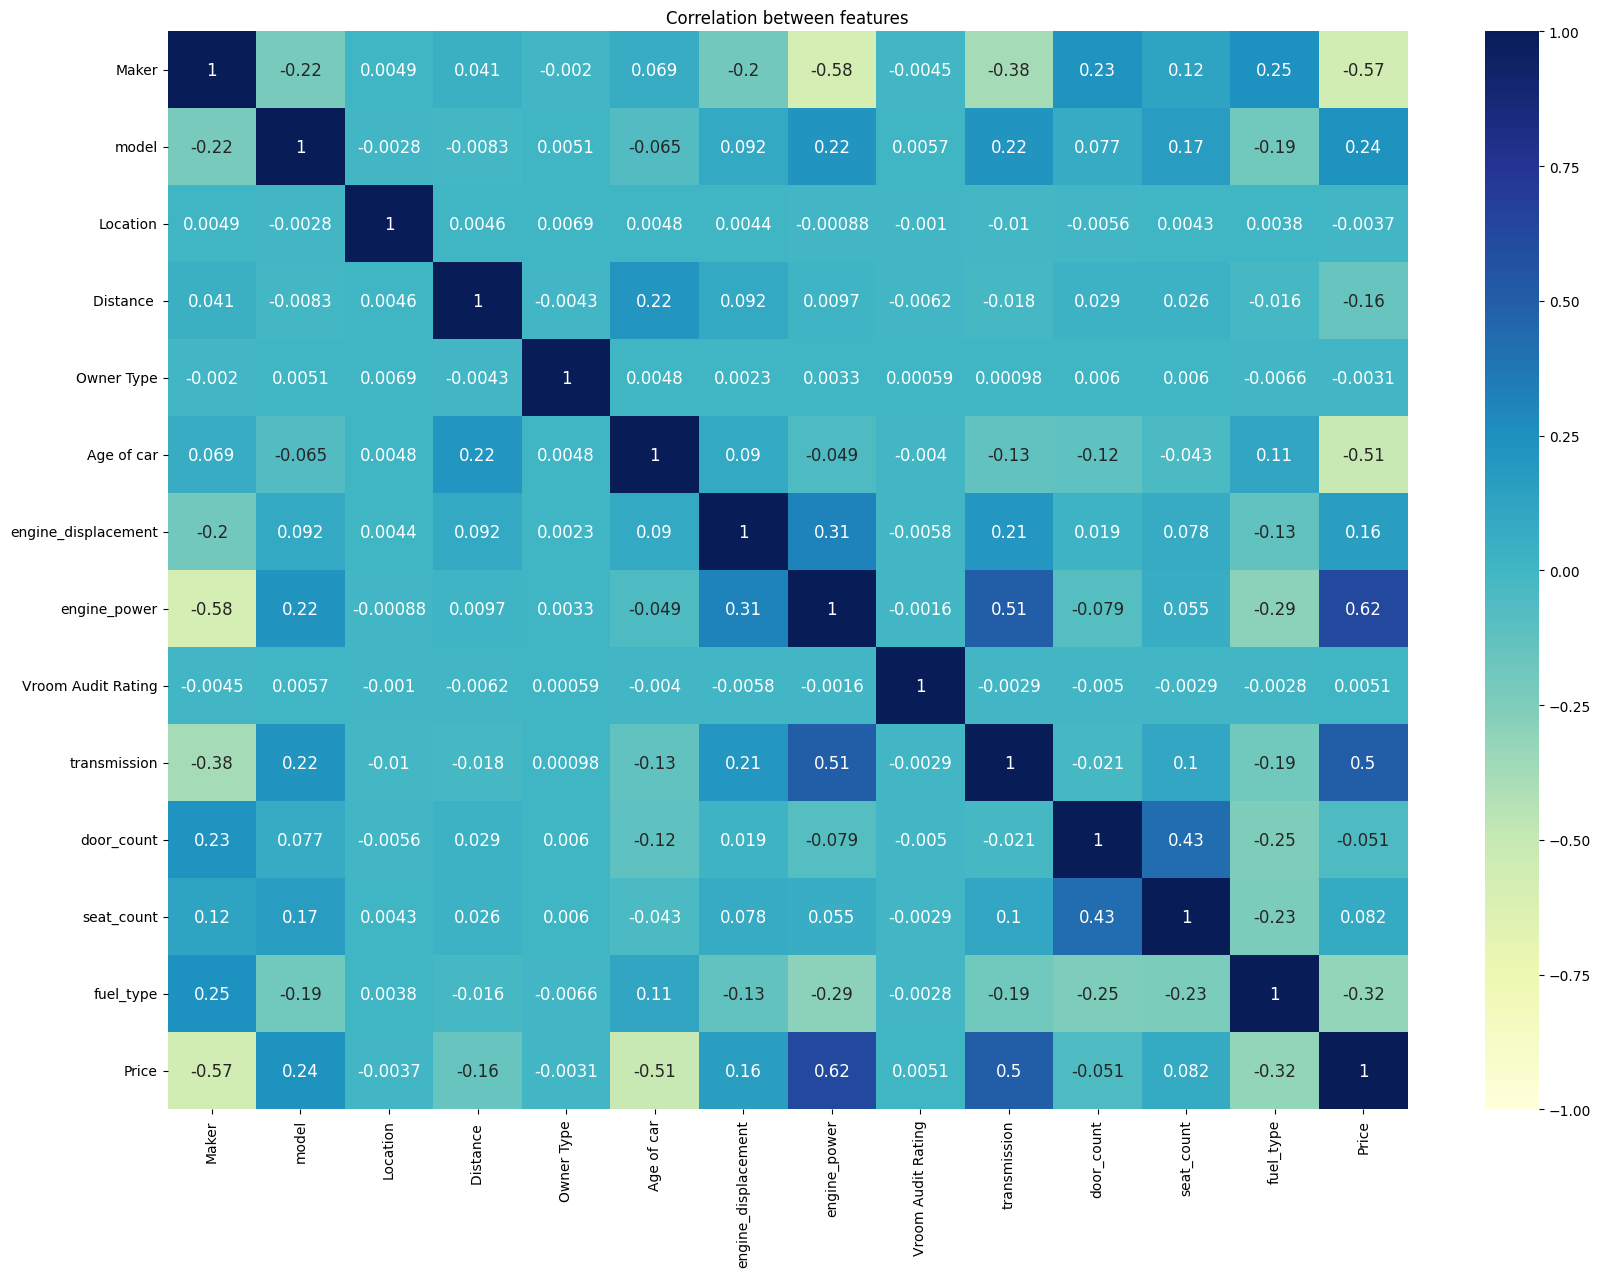

In [524]:
corr = df_features.corr() 
plt.figure(figsize=(20, 14))

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 12})

plt.title('Correlation between features')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

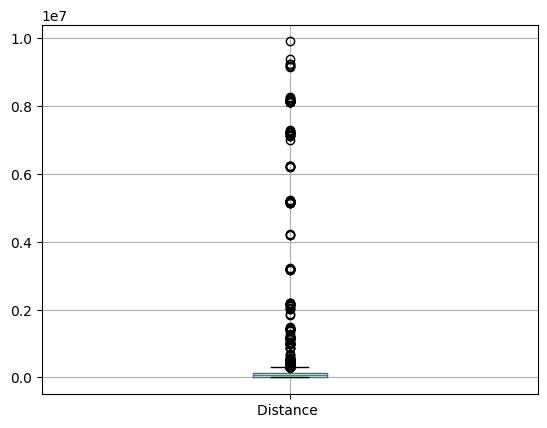

In [525]:
df_features.boxplot(column=['Distance '])
plt.show

In [526]:
# drop target variable 
df_features = df_features.drop(['Price'], axis=1)

# calculation of interquartile range
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Maker                       5.0
model                       8.0
Location                    6.0
Distance               116797.0
Owner Type                  3.0
Age of car                  6.0
engine_displacement       600.0
engine_power               51.0
Vroom Audit Rating          2.0
transmission                1.0
door_count                  0.0
seat_count                  0.0
fuel_type                   1.0
dtype: float64


In [527]:
from scipy import stats
z = np.abs(stats.zscore(df_features))
print(z)

          Maker     model  Location  Distance   Owner Type  Age of car  \
0      0.670441  0.525379  1.586828   0.104124    0.447065    9.979640   
1      0.895167  0.363222  1.586828   0.242751    1.340911    0.342321   
2      1.286569  1.096195  0.003090   0.175768    1.340911    0.772403   
3      0.279039  0.849694  1.263901   0.183296    1.340911    0.127281   
4      1.286569  1.420509  0.313658   0.126131    0.446781    0.342321   
...         ...       ...       ...        ...         ...         ...   
53510  0.670441  0.525379  0.319837   0.236937    0.446781    0.772403   
53511  0.670441  0.525379  1.270080   0.476190    0.446781    0.302801   
53512  1.286569  1.096195  1.580648   0.251009    1.340911    0.987444   
53513  1.061843  1.660480  0.313658   4.043237    1.340911    0.127281   
53514  1.286569  1.420509  0.630406   0.176580    1.340627    0.517842   

       engine_displacement  engine_power  Vroom Audit Rating  transmission  \
0                 0.040059      1

In [528]:
threshold= 3
np.where(z>threshold)

(array([    0,    47,    53, ..., 53507, 53513, 53513], dtype=int64),
 array([ 5,  7,  6, ..., 11,  3,  6], dtype=int64))

In [529]:
np.where((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

(array([    0,     1,     4, ..., 53513, 53514, 53514], dtype=int64),
 array([ 0, 12,  8, ...,  8,  7,  8], dtype=int64))

In [530]:
df_final = df_features
# for i, j in zip(np.where(z>threshold)[0], np.where(z>threshold)[1]):
#     df_final.iloc[i, j] = df_features.iloc[:,j].median()

df_final_out = df_out
# z = np.abs(stats.zscore(df_out))
# for i, j in zip(np.where(z>threshold)[0], np.where(z>threshold)[1]):
#     df_final_out.iloc[i, j] = df_out.iloc[:,j].median()

<function matplotlib.pyplot.show(close=None, block=None)>

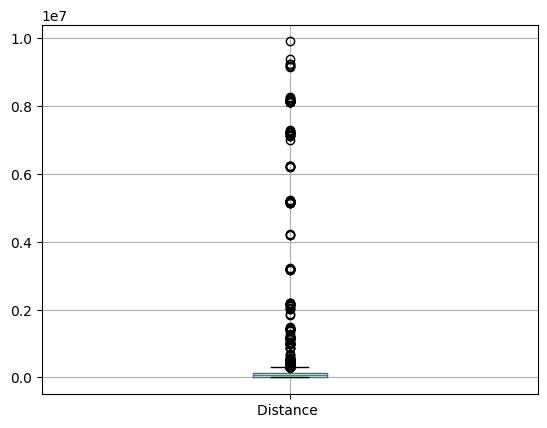

In [531]:
df_final.boxplot(column=['Distance '])
plt.show

In [532]:
# from sklearn.preprocessing import MinMaxScaler
# mm_sca = MinMaxScaler()
# mm_sca

# df_final['Distance '] = mm_sca.fit_transform(df_final[['Distance ']])
# df_final['Distance ']

# df_final_out['Distance '] = mm_sca.fit_transform(df_final_out[['Distance ']])
# df_final_out['Distance ']

In [533]:
Q1 = df_final['Distance '].quantile(0.25)
Q3 = df_final['Distance '].quantile(0.75)
IQR = Q3 - Q1
whisker1=Q1-1.5*IQR
for i in (np.where((df_final['Distance '] < whisker1))):
    df_final.iloc[i, df_final.columns.get_loc('Distance ')]= whisker1
whisker2=Q3+1.5*IQR
for i in (np.where((df_final['Distance '] > whisker2))): 
    df_final.iloc[i, df_final.columns.get_loc('Distance ')]= whisker2
len(np.where((((df_final['Distance '] <(Q1-1.5*IQR)) | (df_final['Distance '] >(Q3+1.5*IQR)))))[0])

0

In [534]:
Q1 = df_final_out['Distance '].quantile(0.25)
Q3 = df_final_out['Distance '].quantile(0.75)
IQR = Q3 - Q1
whisker1=Q1-1.5*IQR
for i in (np.where((df_final_out['Distance '] < whisker1))):
    df_final_out.iloc[i, df_final_out.columns.get_loc('Distance ')]= whisker1
whisker2=Q3+1.5*IQR
for i in (np.where((df_final_out['Distance '] > whisker2))): 
    df_final_out.iloc[i, df_final_out.columns.get_loc('Distance ')]= whisker2
len(np.where((((df_final_out['Distance '] <(Q1-1.5*IQR)) | (df_final_out['Distance '] >(Q3+1.5*IQR)))))[0])

0

<function matplotlib.pyplot.show(close=None, block=None)>

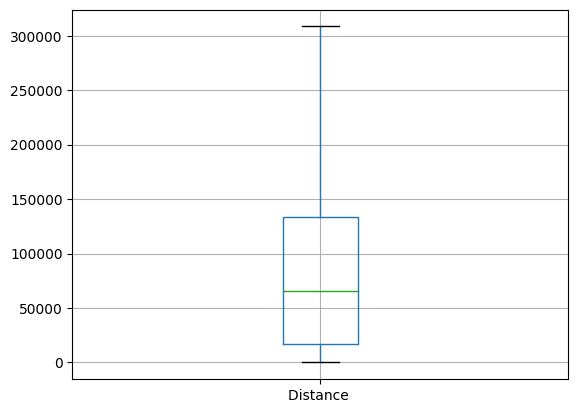

In [535]:
df_final.boxplot(column=['Distance '])
plt.show

In [536]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                53515 non-null  int32  
 1   model                53515 non-null  int32  
 2   Location             53515 non-null  int32  
 3   Distance             53515 non-null  float64
 4   Owner Type           53515 non-null  int32  
 5   Age of car           53515 non-null  int64  
 6   engine_displacement  53515 non-null  int64  
 7   engine_power         53515 non-null  float64
 8   Vroom Audit Rating   53515 non-null  int64  
 9   transmission         53515 non-null  int64  
 10  door_count           53515 non-null  float64
 11  seat_count           53515 non-null  float64
 12  fuel_type            53515 non-null  int64  
dtypes: float64(4), int32(4), int64(5)
memory usage: 4.5 MB


In [537]:
df.shape

(53515, 14)

In [538]:
pd.DataFrame.to_csv(df, "abc.csv")

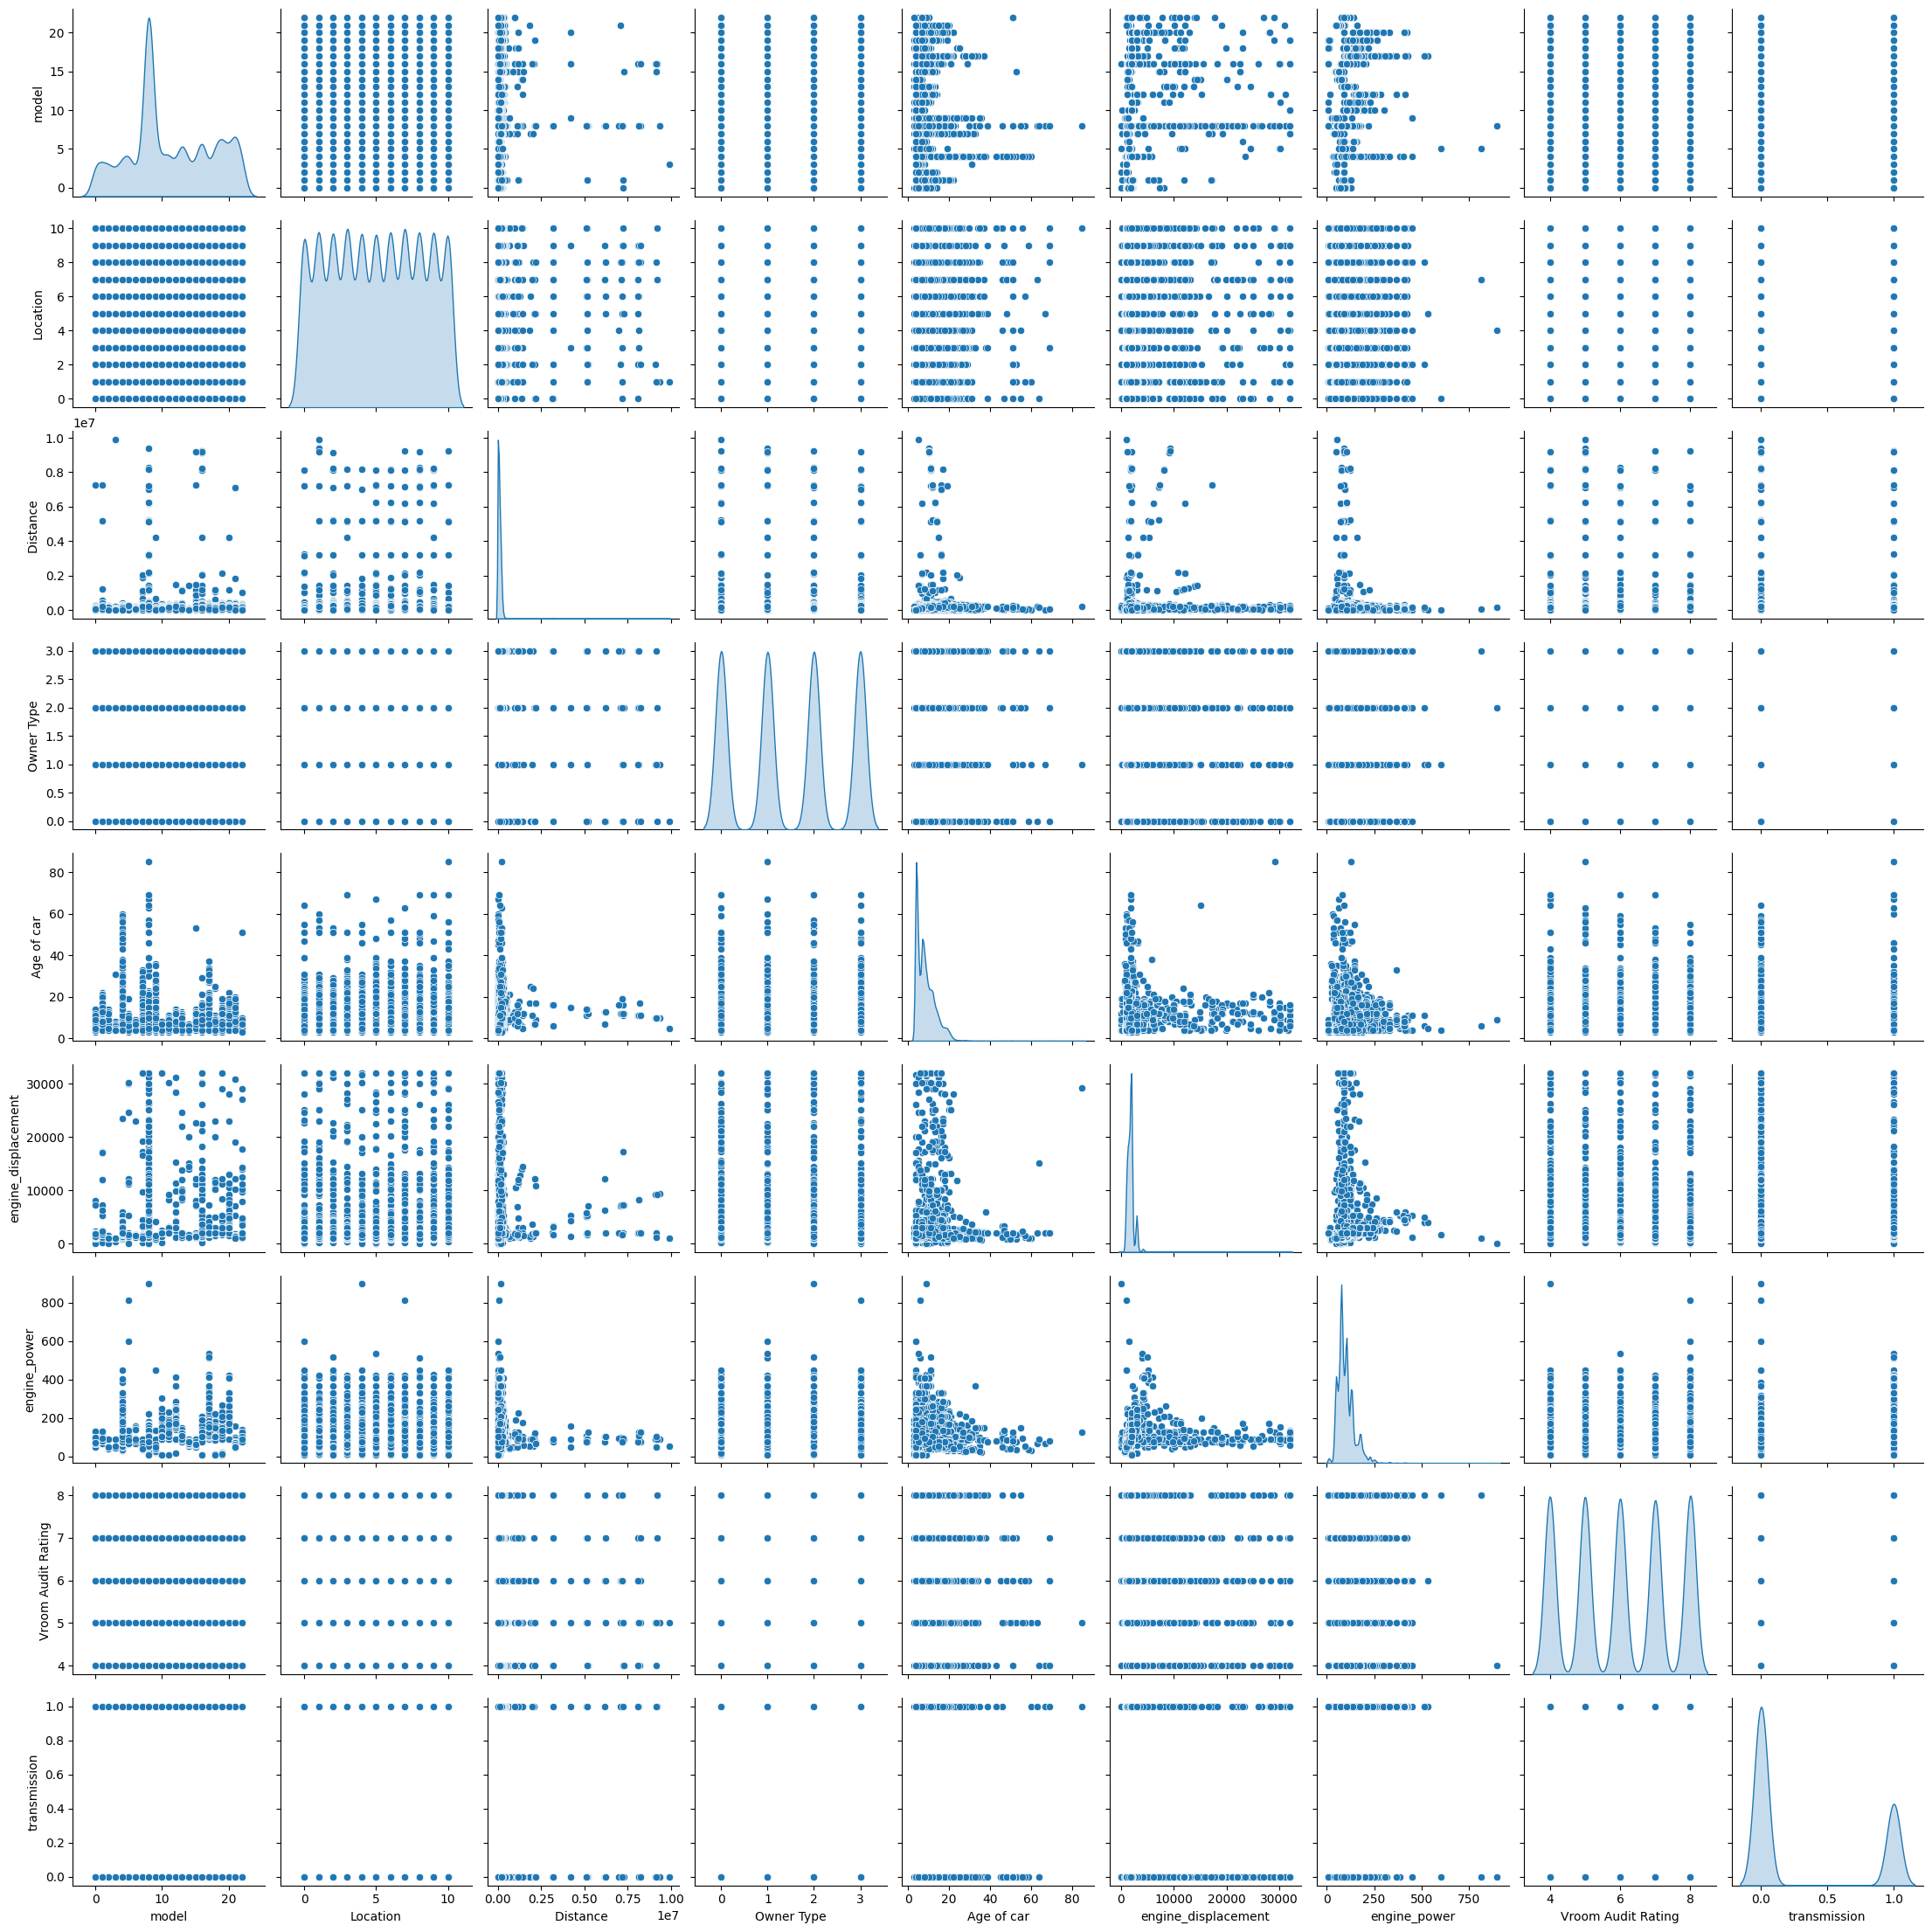

In [539]:
df_attr = df.iloc[:, 1:10]
sns.pairplot(df_attr, diag_kind='kde')

In [540]:
X = df_final
y = df[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [541]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37460 entries, 4844 to 33003
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                37460 non-null  int32  
 1   model                37460 non-null  int32  
 2   Location             37460 non-null  int32  
 3   Distance             37460 non-null  float64
 4   Owner Type           37460 non-null  int32  
 5   Age of car           37460 non-null  int64  
 6   engine_displacement  37460 non-null  int64  
 7   engine_power         37460 non-null  float64
 8   Vroom Audit Rating   37460 non-null  int64  
 9   transmission         37460 non-null  int64  
 10  door_count           37460 non-null  float64
 11  seat_count           37460 non-null  float64
 12  fuel_type            37460 non-null  int64  
dtypes: float64(4), int32(4), int64(5)
memory usage: 3.4 MB


In [542]:
regression_model.score(X_test, y_test)

0.7579178842252271

In [543]:
df_final_out.info()
# y = regression_model.predict(df_final_out)
# y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                5615 non-null   int32  
 1   model                5615 non-null   int32  
 2   Location             5615 non-null   int32  
 3   Distance             5615 non-null   float64
 4   Owner Type           5615 non-null   int32  
 5   Age of car           5615 non-null   int64  
 6   engine_displacement  5615 non-null   int64  
 7   engine_power         5615 non-null   float64
 8   Vroom Audit Rating   5615 non-null   int64  
 9   transmission         5615 non-null   int64  
 10  door_count           5615 non-null   float64
 11  seat_count           5615 non-null   float64
 12  fuel_type            5615 non-null   int64  
dtypes: float64(4), int32(4), int64(5)
memory usage: 482.7 KB


In [544]:
#Since on many dimensions, the relationship is not really linear, let us try polynomial models (quadratic)
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_ = poly.fit_transform(X_train)

X_test_ = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train_, y_train)

y_pred = poly_clf.predict(X_test_)

#print(y_pred)

print(poly_clf.score(X_test_, y_test))

0.8686815181363995


In [545]:
data_pred_ = poly.fit_transform(df_final_out)
data_pred_y = poly_clf.predict(data_pred_)

data_pred_y

array([[ 354034.81182054],
       [1129424.69183732],
       [1435132.02706243],
       ...,
       [ 352264.0104746 ],
       [ 965779.79772194],
       [ 583965.85644588]])

In [546]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

# 80280278784.23747
# 283337.74683976977


93245753455.53947
305361.6764683143


In [547]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
print(dt.score(X_test, y_test))
y_test_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)

mse =mean_squared_error(y_test, y_test_pred)
print("MSE: ",mse)
print("RMSE: ", math.sqrt(mse))
'''
0.8577916808093062
MSE:  101167382950.48906
RMSE:  318068.2048719882
'''


0.8496741905341654
MSE:  106742350113.48384
RMSE:  326714.4779673589


'\n0.8577916808093062\nMSE:  101167382950.48906\nRMSE:  318068.2048719882\n'

In [548]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print(rf.score(X_test, y_test))
y_test_pred = rf.predict(X_test)
# y_train_pred = rf.predict(X_train)

mse =mean_squared_error(y_test, y_test_pred)
print("MSE: ",mse)
print("RMSE: ", math.sqrt(mse))

'''
0.9406615206119693
MSE:  42134672446.10752
RMSE:  205267.3194790333
'''

0.9440171789958204
MSE:  39751908878.47356
RMSE:  199378.8074958659


'\n0.9406615206119693\nMSE:  42134672446.10752\nRMSE:  205267.3194790333\n'

In [549]:
ada = AdaBoostRegressor(loss='square',base_estimator=dt, random_state=0, n_estimators=50, learning_rate=0.1)
ada.fit(X_train,y_train)

print(ada.score(X_test, y_test))

y_test_pred = ada.predict(X_test)
# y_train_pred = ada.predict(X_train_)
'''
0.9464726965378736
MSE:  36802366061.00291
RMSE:  191839.42780618093
'''
mse =mean_squared_error(y_test, y_test_pred)
print("MSE: ",mse)
print("RMSE: ", math.sqrt(mse))



0.9453279549604872
MSE:  38821161806.909615
RMSE:  197030.86511232096


In [552]:
#using ada as it has least rmse
data_pred_y = ada.predict(df_final_out)

In [ ]:
data_pred_y

array([ 360843.75,  990238.5 , 1335122.25, ...,  388323.75, 1124375.25,
        596580.  ])

In [ ]:
df_out = pd.DataFrame() #[df_final_out['Id'] , data_pred_y.flatten()], index=['Id', 'Price'])
df_out['Id'] = df_pred['Id']
df_out['Price'] = pd.Series(data_pred_y.flatten())
df_out.sample(10)

,Id,Price
3056,14057,585677.25
3970,14971,1134184.50
312,11313,535122.75
371,11372,2692800.00
2041,13042,1761881.25
3699,14700,2171838.75
252,11253,1058188.50
5421,16422,1320765.75
4303,15304,217533.00
405,11406,861845.25


In [ ]:
pd.DataFrame.to_csv(df_out, "output_v5_2.csv",index=False)